Mean    : 60.47
Variance: 805.56

Frequency Distribution :
Rating Interval  Count
        [0, 10)    731
       [10, 20)   1094
       [20, 30)   1244
       [30, 40)   1200
       [40, 50)   1302
       [50, 60)   1537
       [60, 70)   1769
       [70, 80)   1875
       [80, 90)   2697
      [90, 100)   2158


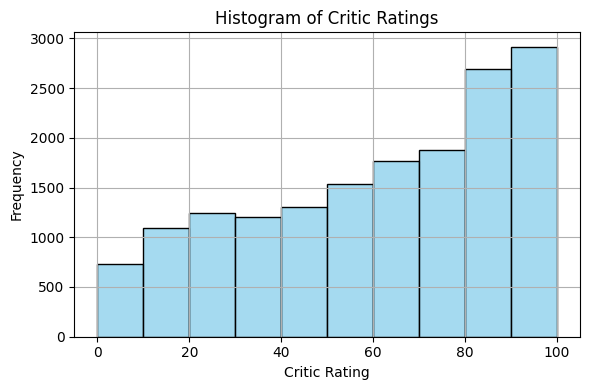

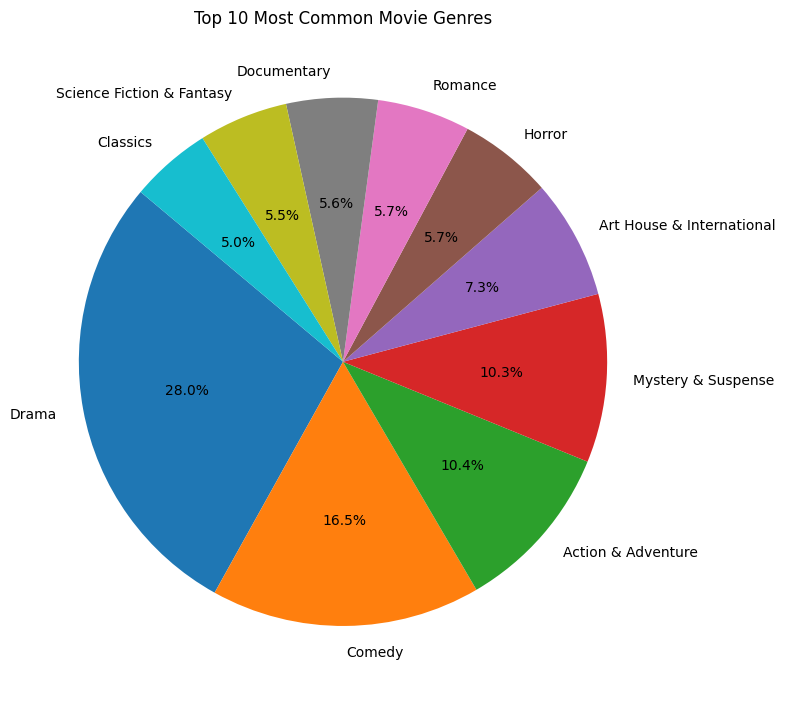


Mean (From Frequency Distribution): 59.3423
Variance (From Frequency Distribution): 757.4281
Difference in Means: 1.13
Difference in Variances: 48.13

95% Confidence Interval for Mean: (60.0627, 61.035)
95% Tolerance Interval: (4.9191, 116.1786)
Percentage of test data within Tolerance Interval: 97.71%

Hypothesis Test (mean > 60):
T-statistic: 2.111
P-value (one-sided): 0.0174
Since the T-statistic (2.111) is positive and the one-sided P-value (0.0174) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is statistically significant evidence to suggest that the mean critic rating is greater than 60.


In [2]:
#Group Members :
#Team Lead: Syeda Fatima tu Zahra 2024625
#Member 2: Hooria Dar 2024232
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from collections import Counter

df = pd.read_csv("rotten_tomatoes_movies.csv")
df = df.dropna()

critic_ratings = df['critic_rating']

# Mean and variance
mean_original = round(np.mean(critic_ratings), 2)
var_original = round(np.var(critic_ratings, ddof=1), 2)

print(f"Mean    : {mean_original}")
print(f"Variance: {var_original}")

# Frequency distribution
bins = np.arange(0, 101, 10)
df['rating_bin'] = pd.cut(df['critic_rating'], bins=bins, right=False)
freq_table = df['rating_bin'].value_counts().sort_index()

# Frequency table
freq_table_df = freq_table.reset_index()
freq_table_df.columns = ['Rating Interval', 'Count']
print("\nFrequency Distribution :")
print(freq_table_df.to_string(index=False))

# Histogram of critic ratings
plt.figure(figsize=(6, 4))
sns.histplot(critic_ratings, bins=bins, kde=False, color='skyblue', edgecolor='black')
plt.title("Histogram of Critic Ratings")
plt.xlabel("Critic Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie chart of top 10 genres
genre_series = df['genres'].dropna().apply(lambda x: x.split(','))
all_genres = [genre.strip() for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(8, 8))
plt.pie(top_genres.values(), labels=top_genres.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Common Movie Genres")
plt.tight_layout()
plt.show()

# Mean and variance from frequency distribution
bin_centers = [(interval.left + interval.right) / 2 for interval in freq_table.index]
frequencies = freq_table.values
total = sum(frequencies)

mean_freq = round(np.sum(np.array(bin_centers) * frequencies) / total, 4)
var_freq = round(np.sum(frequencies * (np.array(bin_centers) - mean_freq)**2) / (total - 1), 4)

print(f"\nMean (From Frequency Distribution): {mean_freq}")
print(f"Variance (From Frequency Distribution): {var_freq}")
print(f"Difference in Means: {abs(mean_original - mean_freq):.2f}")
print(f"Difference in Variances: {abs(var_original - var_freq):.2f}")

# Confidence and tolerance interval
train, test = train_test_split(critic_ratings, test_size=0.2, random_state=42)

n = len(train)
mean_train = np.mean(train)
std_train = np.std(train, ddof=1)
alpha = 0.05

ci_margin = stats.t.ppf(1 - alpha / 2, n - 1) * (std_train / np.sqrt(n))
ci_lower = round(mean_train - ci_margin, 4)
ci_upper = round(mean_train + ci_margin, 4)

print(f"\n95% Confidence Interval for Mean: ({ci_lower}, {ci_upper})")

k = stats.t.ppf(1 - alpha / 2, n - 1) * np.sqrt(1 + 1/n)
tol_lower = round(mean_train - k * std_train, 4)
tol_upper = round(mean_train + k * std_train, 4)

print(f"95% Tolerance Interval: ({tol_lower}, {tol_upper})")

within = ((test >= tol_lower) & (test <= tol_upper)).sum()
percent_within = round(100 * within / len(test), 2)
print(f"Percentage of test data within Tolerance Interval: {percent_within}%")

# Hypothesis test (is mean > 60)
t_stat, p_val = stats.ttest_1samp(critic_ratings, popmean=60)

print(f"\nHypothesis Test (mean > 60):")
print(f"T-statistic: {round(t_stat, 3)}")
print(f"P-value (one-sided): {round(p_val / 2, 4)}")

if t_stat > 0 and p_val / 2 < alpha:
    print(f"Since the T-statistic ({round(t_stat, 3)}) is positive and the one-sided P-value ({round(p_val / 2, 4)}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is statistically significant evidence to suggest that the mean critic rating is greater than 60.")
else:
    print(f"Since the T-statistic ({round(t_stat, 3)}) is not positive or the one-sided P-value ({round(p_val / 2, 4)}) is not less than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough statistically significant evidence to suggest that the mean critic rating is greater than 60.")
